# Factorial

Write a function to calculate the factorial of a non-negative integer 'n'. The factorial of 'n' is the product of all positive integers from 1 to 'n'. Mathematically, it is denoted as 'n!' and defined as:

```
n! = n * (n - 1) * (n - 2) * ... * 2 * 1
```

The factorial of 0 is defined as 1.

Your task is to implement a function that takes a non-negative integer 'n' as input and returns its factorial as the output.

Example:
```
Input: 5
Output: 120 (since 5! = 5 * 4 * 3 * 2 * 1 = 120)
```
```
Input: 0
Output: 1 (since 0! is defined as 1)
```

We will test the function for inputs 1 to 10

In [1]:
import tensorflow as tf

# Check if GPU is available
print(tf.test.gpu_device_name())

/device:GPU:0


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd

import itertools

# Number of digits in the binary representation of the largest number in the training set, which would be 2^NUM_DIGITS - 1.
NUM_DIGITS = 10

# First 10 number will be used as test data, and the rest will be used for training.
DATA_SIZE = 50

# add random states for numpy and tensorflow
np.random.seed(42)
tf.random.set_seed(42)


def binary_encode(num, num_bits):
    binary_string = format(num, f"0{num_bits}b")
    return [int(digit) for digit in binary_string]


def get_relative_error_rate(actual, predicted):
    return np.abs(actual - predicted) / actual

In [3]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n - 1)


entries = []
for i in range(1, DATA_SIZE + 1):
    fact = factorial(i)
    log10_fact = np.log10(float(fact))
    log10_fact_int = int(log10_fact)
    prediction = int(np.power(10, np.log10(float(fact))))
    relative_error_rate = get_relative_error_rate(
        fact,
        prediction,
    )
    entries.append(
        (
            i,
            fact,
            log10_fact,
            log10_fact_int,
            relative_error_rate,
        )
    )

df = pd.DataFrame(
    entries,
    columns=[
        "Number",
        "Factorial",
        "log10_factorial",
        "log10_factorial_int",
        "Relative Error Rate",
    ],
)

df

,Number,Factorial,log10_factorial,log10_factorial_int,Relative Error Rate
0,1,1,0.000000,0,0.000000e+00
1,2,2,0.301030,0,0.000000e+00
2,3,6,0.778151,0,0.000000e+00
3,4,24,1.380211,1,4.166667e-02
4,5,120,2.079181,2,8.333333e-03
5,6,720,2.857332,2,0.000000e+00
6,7,5040,3.702431,3,0.000000e+00
7,8,40320,4.605521,4,2.480159e-05
8,9,362880,5.559763,5,0.000000e+00
9,10,3628800,6.559763,6,0.000000e+00


In [4]:
df.to_csv("factorial.csv", index=False)

In [5]:
# Generate training and test data
train_range = range(10, DATA_SIZE)
test_range = range(1, 11)

X_train = np.array([binary_encode(i, NUM_DIGITS) for i in train_range])
y_train = df["log10_factorial_representation"].values[train_range]

print(X_train.shape, y_train.shape)


X_test = np.array([binary_encode(i, NUM_DIGITS) for i in test_range])
y_test = df["log10_factorial_representation"].values[test_range]

print(X_test.shape, y_test.shape)

KeyError: 'log10_factorial_representation'

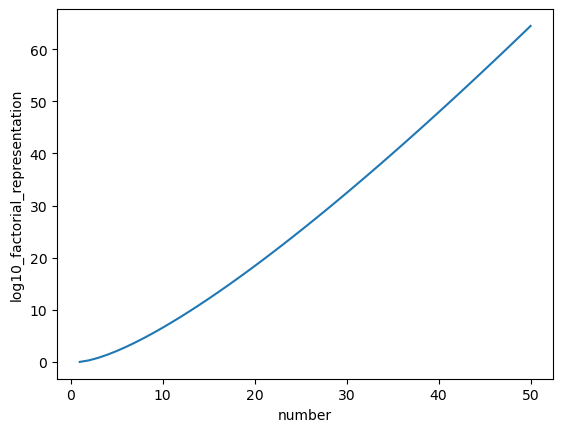

In [ ]:
# plot number vs log10_factorial_representation
import matplotlib.pyplot as plt

plt.plot(df["number"], df["log10_factorial_representation"])
plt.xlabel("number")
plt.ylabel("log10_factorial_representation")
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


# Define a custom callback to control the output display
class DisplayOnceCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 100 == 0:
            print(f"> .. Epoch {epoch}, Loss: {logs['loss']}")
        if epoch == 0:
            print("> .. Starting training...")

In [ ]:
def train_model(X_train, y_train, n_epochs=1_000, model_config=1):
    # Selecting the type of the model we want to use.
    if model_config == 1:
        model = tf.keras.Sequential(
            [
                tf.keras.layers.Dense(
                    100,
                    input_shape=(NUM_DIGITS,),
                    activation="relu",
                ),
                tf.keras.layers.Dense(1),
            ]
        )

    elif model_config == 2:
        model = tf.keras.Sequential(
            [
                tf.keras.layers.Dense(
                    100,
                    input_shape=(NUM_DIGITS,),
                    activation="relu",
                ),
                tf.keras.layers.Dense(100, activation="relu"),
                tf.keras.layers.Dense(1),
            ]
        )

    elif model_config == 3:
        model = tf.keras.Sequential(
            [
                tf.keras.layers.Dense(
                    100,
                    input_shape=(NUM_DIGITS,),
                    activation="relu",
                ),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(100, activation="relu"),
                tf.keras.layers.Dropout(0.2),
                tf.keras.layers.Dense(1),
            ]
        )

    model.compile(optimizer="adam", loss="mse")

    history = model.fit(
        X_train,
        y_train,
        epochs=n_epochs,
        batch_size=16,
        validation_split=0.1,
        verbose=0,
        callbacks=[DisplayOnceCallback()],
    )

    return model, history

In [ ]:
params = {"n_epochs": [1_000, 2_000], "model_config": [1, 2, 3]}


models = []
for i, pair in enumerate(itertools.product(*params.values())):
    print(f"Training model {i+1} with {pair=}")
    n_epochs = pair[0]
    model_config = pair[1]
    model, _ = train_model(
        X_train,
        y_train,
        n_epochs=n_epochs,
        model_config=model_config,
    )
    models.append(model)


for i, model in enumerate(models):
    print(f"Model {i+1} Test loss: {model.evaluate(X_test, y_test)}")

predictions = {}
for i, model in enumerate(models):
    print(f"Predicting with model {i+1}")
    predictions[f"model_{i+1}"] = model.predict(X_test).flatten()

Training model 1 with pair=(1000, 1)
Epoch 0, Loss: 1187.136962890625
Starting training...
Epoch 100, Loss: 207.9838104248047
Epoch 200, Loss: 73.92999267578125
Epoch 300, Loss: 26.469661712646484
Epoch 400, Loss: 13.377116203308105
Epoch 500, Loss: 6.885431289672852
Epoch 600, Loss: 2.7897214889526367
Epoch 700, Loss: 1.109993577003479
Epoch 800, Loss: 0.5250399112701416
Epoch 900, Loss: 0.3202894926071167
Training model 2 with pair=(1000, 2)
Epoch 0, Loss: 1177.6925048828125
Starting training...
Epoch 100, Loss: 18.178163528442383
Epoch 200, Loss: 0.9370865225791931
Epoch 300, Loss: 0.0841367095708847
Epoch 400, Loss: 0.014902669936418533
Epoch 500, Loss: 0.0047239940613508224
Epoch 600, Loss: 0.0018881538417190313
Epoch 700, Loss: 0.0008344938396476209
Epoch 800, Loss: 0.0004034284793306142
Epoch 900, Loss: 0.00018110981909558177
Training model 3 with pair=(1000, 3)
Epoch 0, Loss: 1173.1263427734375
Starting training...
Epoch 100, Loss: 45.482234954833984
Epoch 200, Loss: 11.0156822

In [ ]:
for i, (pair, key) in enumerate(zip(itertools.product(*params.values()), predictions.keys())):
    print(i, pair, key)

0 (1000, 1) model_1
1 (1000, 2) model_2
2 (1000, 3) model_3
3 (2000, 1) model_4
4 (2000, 2) model_5
5 (2000, 3) model_6


[(1000, 1), (1000, 2), (1000, 3), (2000, 1), (2000, 2), (2000, 3)]

In [ ]:
def visualize_test_results(params, predictions, y_test, suptitle=None):
    # Get all combinations of pairs
    combinations = list(itertools.product(*params.values()))

    # Create a 2x3 plot
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))

    # Set the title of the plot
    if suptitle is not None:
        fig.suptitle(suptitle)

    for i, (pair, key) in enumerate(
        zip(itertools.product(*params.values()), predictions.keys())
    ):
        X_test = list(range(1, DATA_SIZE + 1))
        y_pred = predictions[f"model_{i+1}"]

        axes[i // 3, i % 3].scatter(X_test, y_test, label="Actual")
        axes[i // 3, i % 3].plot(X_test, y_pred, color="red", label="Predicted")
        axes[i // 3, i % 3].set_xlabel("Input")
        axes[i // 3, i % 3].set_ylabel("Output")
        axes[i // 3, i % 3].set_title(f"{key}: {pair}")
        axes[i // 3, i % 3].legend()

    plt.tight_layout()
    plt.show()

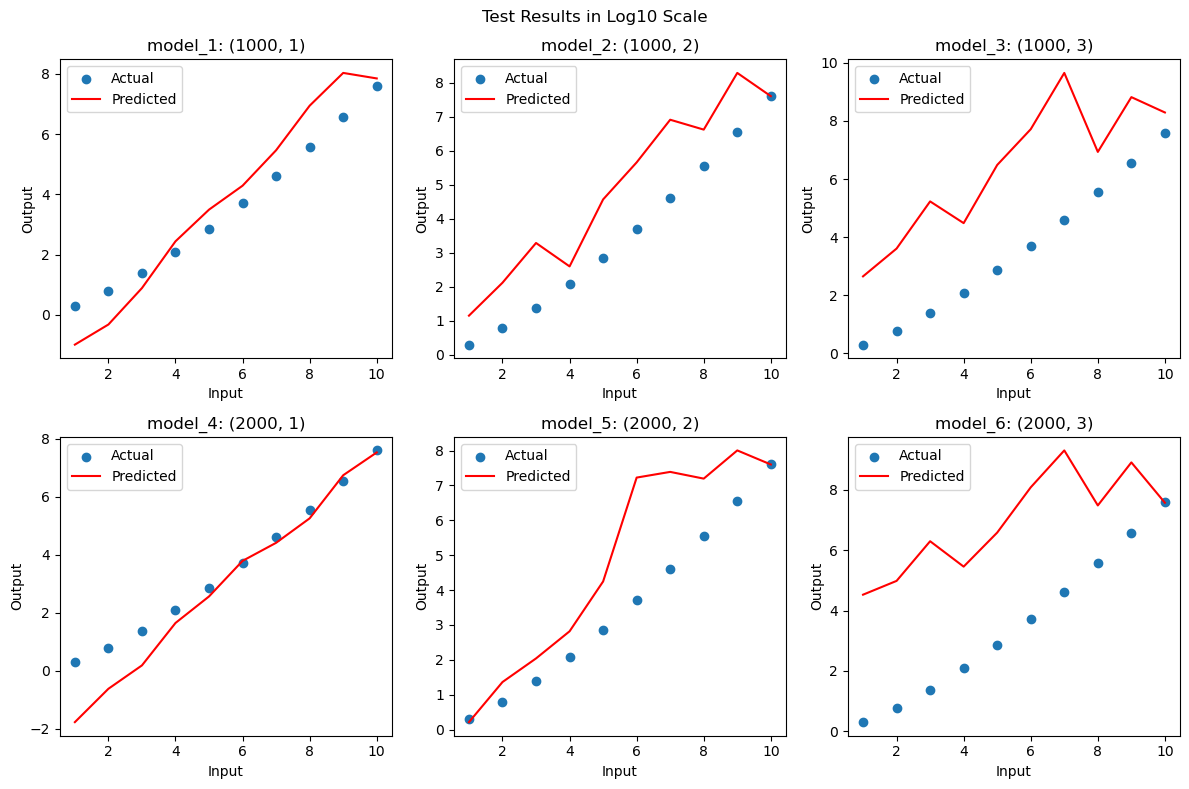

In [ ]:
visualize_test_results(
    params, predictions, y_test, suptitle="Test Results in Log10 Scale"
)

In [ ]:
predictions_actuals["model_1"]

array([1.0197301e-01, 4.7521597e-01, 7.7057242e+00, 2.7532782e+02,
       3.1061235e+03, 1.9362166e+04, 2.9154875e+05, 8.7867470e+06,
       1.0772469e+08, 7.0671472e+07], dtype=float32)

In [ ]:
predictions_actuals = {}
for model, log_predictions in predictions.items():
    predictions_actuals[model] = np.power(10, log_predictions)

y_test_actuals = np.power(10, y_test)

In [ ]:
y_test

array([0.30103   , 0.77815125, 1.38021124, 2.07918125, 2.8573325 ,
       3.70243054, 4.60552052, 5.55976303, 6.55976303, 7.60115572])

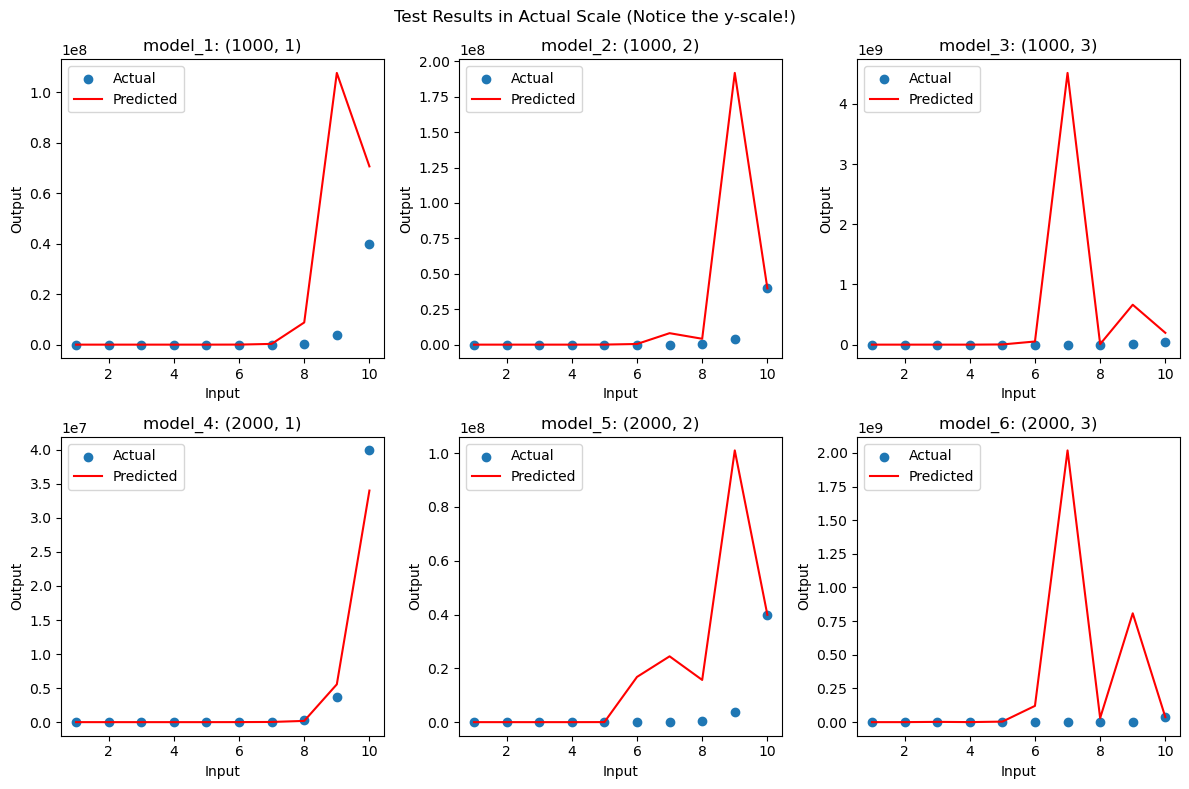

In [ ]:
visualize_test_results(params, predictions_actuals, y_test_actuals, suptitle="Test Results in Actual Scale (Notice the y-scale!)")

In [ ]:
def visualize_all_results(params, predictions, y, suptitle=None):
    combinations = list(itertools.product(*params.values()))
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))

    if suptitle is not None:
        fig.suptitle(suptitle)

    for i, (pair, key) in enumerate(
        zip(itertools.product(*params.values()), predictions.keys())
    ):
        X_test = list(range(1, DATA_SIZE + 1))
        y_pred = predictions[f"model_{i+1}"]

        axes[i // 3, i % 3].scatter(X_test, y, label="Actual")
        axes[i // 3, i % 3].plot(X_test, y_pred, color="red", label="Predicted")
        axes[i // 3, i % 3].fill_between(
            [0, 10],
            [0, 0],
            [y.max(), y.max()],
            color="gray",
            alpha=0.2,
        )
        axes[i // 3, i % 3].text(
            0.1,
            0.4,
            "Testing Range",
            transform=axes[i // 3, i % 3].transAxes,
            rotation=90,
        )
        axes[i // 3, i % 3].set_xlabel("Input")
        axes[i // 3, i % 3].set_ylabel("Output")
        axes[i // 3, i % 3].set_title(f"{key}: {pair}")
        axes[i // 3, i % 3].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
X_train = np.array([binary_encode(i, NUM_DIGITS) for i in train_range])
X_test = np.array([binary_encode(i, NUM_DIGITS) for i in test_range])

#  X_train and X_test combine
all_X = np.concatenate((X_test, X_train))
all_y = np.concatenate((y_test, y_train))

all_predictions = {}
for i, model in enumerate(models):
    print(f"Predicting with model {i+1}")
    all_predictions[f"model_{i+1}"] = model.predict(all_X).flatten()

Predicting with model 1
2/2 [==============================] - 0s 4ms/step
Predicting with model 2
2/2 [==============================] - 0s 4ms/step
Predicting with model 3
2/2 [==============================] - 0s 4ms/step
Predicting with model 4
2/2 [==============================] - 0s 9ms/step
Predicting with model 5
2/2 [==============================] - 0s 4ms/step
Predicting with model 6
2/2 [==============================] - 0s 4ms/step


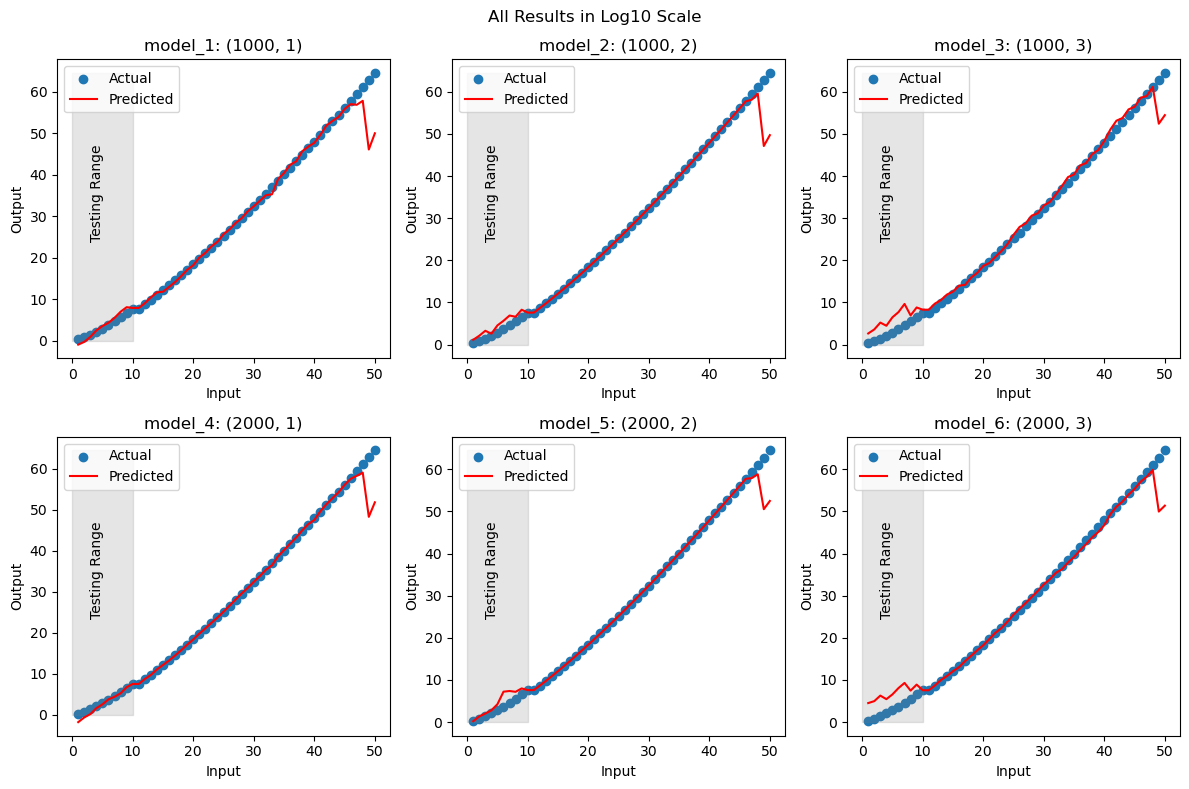

In [ ]:
visualize_all_results(params, all_predictions, all_y, suptitle="All Results in Log10 Scale")